# Logistic Regression 

La idea de regresion logistica es encontrar una relacion entre una caracteristica y la probabilidad de que sea una clase.

# Logistic or linear regression

$P(y=1 | X)$

## Linear regression 

$P(X) = b0 + b1X$ 


donde P(X) es la probabilidad de que P(y=1 | X)

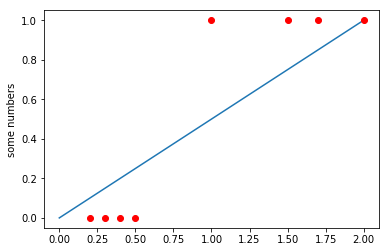

In [33]:
import matplotlib.pyplot as plt
plt.plot([0, 0.5, 1])
plt.ylabel('some numbers')
plt.plot([0.5, 0.4, 0.3, 0.2, 1, 1.5, 1.7, 2], [0, 0, 0, 0,1, 1, 1, 1], 'ro')
plt.show()

## Logistic_regression

$log\left( \frac{P(X)}{1-P(X)}\right) = b0 + b1X$ 

Text(0, 0.5, 'Logit - L')

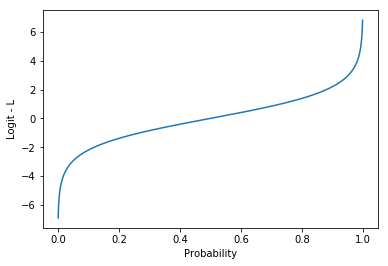

In [34]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def logit(x):
    return np.log( x / (1 - x) )

x = np.arange(0.001,0.999, 0.0001)
y = [logit(n) for n in x]
plt.plot(x,y)
plt.xlabel("Probability")
plt.ylabel("Logit - L")

$P(X) = \frac{e^{b0 + b1X}}{1 + e^{b0 + b1X}}$ 

$P(X) = \dfrac{e^{b0 + b1X}}{1 + e^{b0 + b1X}}$ 

$σ
(
z
)
=
\dfrac{1}{
1
+
e^{
−
z}}
$

Text(0, 0.5, 'Probability')

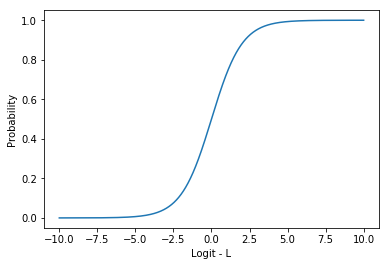

In [35]:
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))
x = np.arange(-10, 10, 0.0001)
y = [sigmoid(n) for n in x]
plt.plot(x,y)
plt.xlabel("Logit - L")
plt.ylabel("Probability")

##  Maximum Likelihood Estimation

![alt text](Maximum.png "Title")

In [36]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

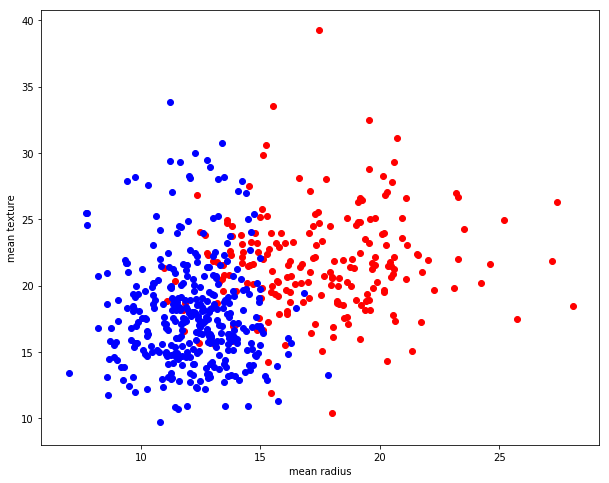

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
#---copy from dataset into a 2-d list---
X = []
for target in range(2):
    X.append([[], []])
    for i in range(len(cancer.data)): # target is 0 or 1
        if cancer.target[i] == target:
            X[target][0].append(cancer.data[i][0]) # first feature - mean radius
            X[target][1].append(cancer.data[i][1]) # second feature — mean texture
colours = ("r", "b") # r: malignant, b: benign
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
for target in range(2):
    ax.scatter(X[target][0],
        X[target][1],
        c=colours[target])
ax.set_xlabel("mean radius")
ax.set_ylabel("mean texture")
plt.show()

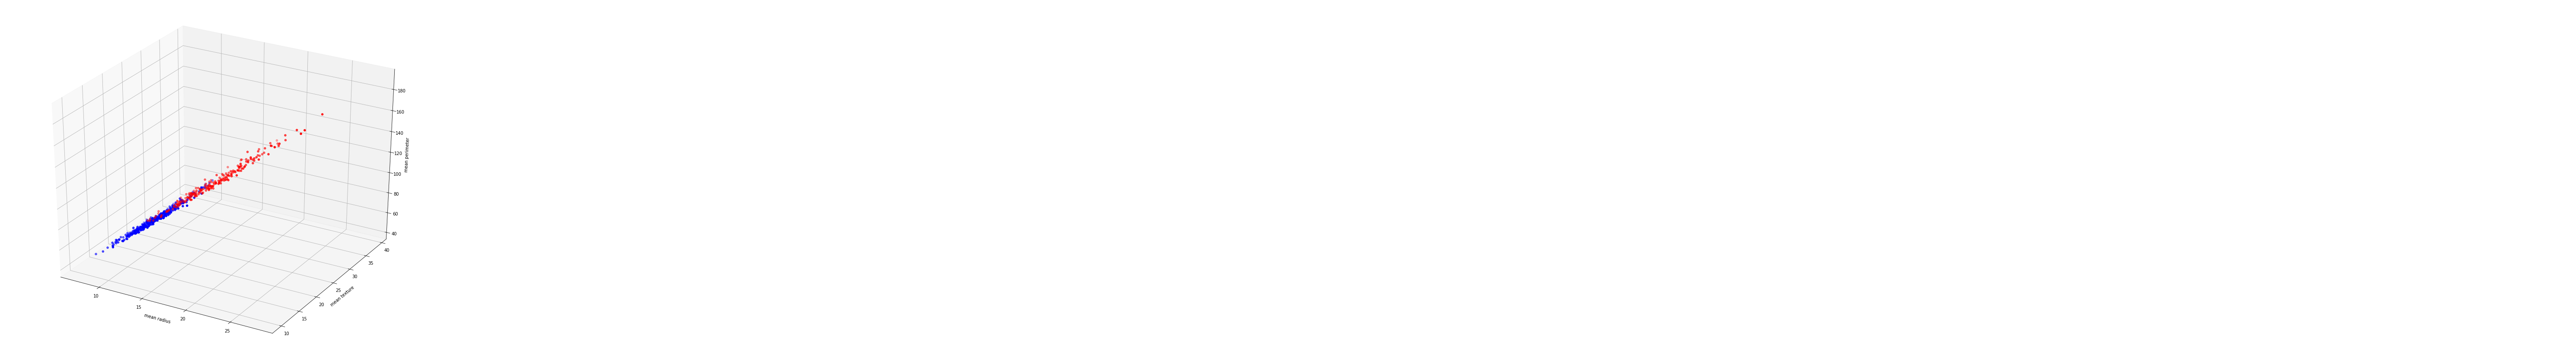

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
#---copy from dataset into a 2-d array---
X = []
for target in range(2):
    X.append([[], [], []])
    for i in range(len(cancer.data)): # target is 0,1
        if cancer.target[i] == target:
            X[target][0].append(cancer.data[i][0])
            X[target][1].append(cancer.data[i][1])
            X[target][2].append(cancer.data[i][2])
colours = ("r", "b") # r: malignant, b: benign
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
for target in range(2):
    ax.scatter(X[target][0],
        X[target][1],
        X[target][2],
        c=colours[target])
ax.set_xlabel("mean radius")
ax.set_ylabel("mean texture")
ax.set_zlabel("mean perimeter")
plt.show()

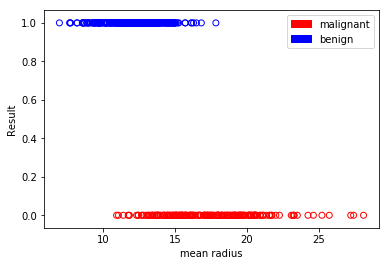

In [39]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer() # Load dataset
x = cancer.data[:,0] # mean radius
y = cancer.target # 0: malignant, 1: benign
colors = {0:'red', 1:'blue'} # 0: malignant, 1: benign
plt.scatter(x,y,
facecolors='none',
edgecolors=pd.DataFrame(cancer.target)[0].apply(lambda x:
colors[x]),
cmap=colors)
plt.xlabel("mean radius")
plt.ylabel("Result")
red = mpatches.Patch(color='red', label='malignant')
blue = mpatches.Patch(color='blue', label='benign')
plt.legend(handles=[red, blue], loc=1)

In [40]:
from sklearn import linear_model
import numpy as np
log_regress = linear_model.LogisticRegression(solver='lbfgs')
#---train the model---
log_regress.fit(X = np.array(x).reshape(len(x),1), y = y)
#---print trained model intercept---
print(log_regress.intercept_) # [ 8.19393897]
#---print trained model coefficients---
print(log_regress.coef_) # [[-0.54291739]]

[15.120902]
[[-1.02475609]]


Text(0, 0.5, 'Probability')

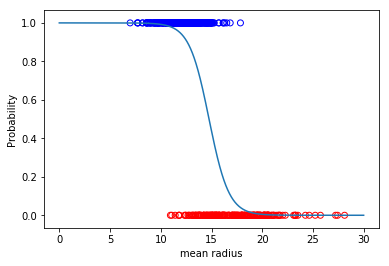

In [41]:
def sigmoid(x):
    return (1 / (1 +
        np.exp(-(log_regress.intercept_[0] +
            (log_regress.coef_[0][0] * x)))))
x1 = np.arange(0, 30, 0.01)
y1 = [sigmoid(n) for n in x1]
plt.scatter(x,y,
facecolors='none', edgecolors=pd.DataFrame(cancer.target)[0].apply(lambda x: colors[x]),cmap=colors)
plt.plot(x1,y1)
plt.xlabel("mean radius")
plt.ylabel("Probability")

In [42]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer() # Load dataset

In [43]:
from sklearn.model_selection import train_test_split
train_set, test_set, train_labels, test_labels = train_test_split(
cancer.data, # features
cancer.target, # labels
test_size = 0.25, # split ratio
random_state = 1, # set random seed
stratify = cancer.target) # randomize based on labels

In [44]:
from sklearn import linear_model
x = train_set[:,0:30] # mean radius
y = train_labels # 0: malignant, 1: benign
log_regress = linear_model.LogisticRegression( solver = 'lbfgs', max_iter=10000)
log_regress.fit(X = x,
y = y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [45]:
print(log_regress.intercept_) #
print(log_regress.coef_) #

[37.98579725]
[[ 0.67504529  0.2858343  -0.41010791  0.0350934  -0.08621625 -0.15575901
  -0.39255126 -0.16905287 -0.23521755 -0.02105222 -0.09654004  0.87815069
   0.44000939 -0.15345184 -0.01209804 -0.00611389 -0.10047214 -0.0305275
  -0.03515974 -0.00220245  0.21357748 -0.51173903 -0.12069075 -0.01273825
  -0.19827105 -0.70201103 -1.27234211 -0.42066068 -0.66879879 -0.09236708]]


In [46]:
import pandas as pd
#---get the predicted probablities and convert into a dataframe---
preds_prob = pd.DataFrame(log_regress.predict_proba(X=test_set))
#---assign column names to prediction---
preds_prob.columns = ["Malignant", "Benign"]
#---get the predicted class labels---
preds = log_regress.predict(X=test_set)
preds_class = pd.DataFrame(preds)
preds_class.columns = ["Prediction"]
#---actual diagnosis---
original_result = pd.DataFrame(test_labels)
original_result.columns = ["Original Result"]
#---merge the three dataframes into one---
result = pd.concat([preds_prob, preds_class, original_result], axis=1)
print(result.head())

   Malignant    Benign  Prediction  Original Result
0   0.996648  0.003352           0                0
1   0.999835  0.000165           0                0
2   0.026057  0.973943           1                1
3   0.999986  0.000014           0                0
4   0.578299  0.421701           0                0


In [47]:
#---generate table of predictions vs actual---
print("---Confusion Matrix---")
print(pd.crosstab(preds, test_labels))

---Confusion Matrix---
col_0   0   1
row_0        
0      48   3
1       5  87


In [48]:
from sklearn import metrics
#---view the confusion matrix---
print(metrics.confusion_matrix(y_true = test_labels, # True labels
y_pred = preds)) # Predicted labels

[[48  5]
 [ 3 87]]


In [49]:
#---get the accuracy of the prediction---
print("---Accuracy---")
print(log_regress.score(X = test_set ,
y = test_labels))

---Accuracy---
0.9440559440559441


In [50]:
print(metrics.classification_report(
y_true = test_labels,
y_pred = preds))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92        53
           1       0.95      0.97      0.96        90

   micro avg       0.94      0.94      0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



# Multi-Class Logistic Regression

In [51]:
from sklearn.datasets import load_digits
digits = load_digits()

In [52]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


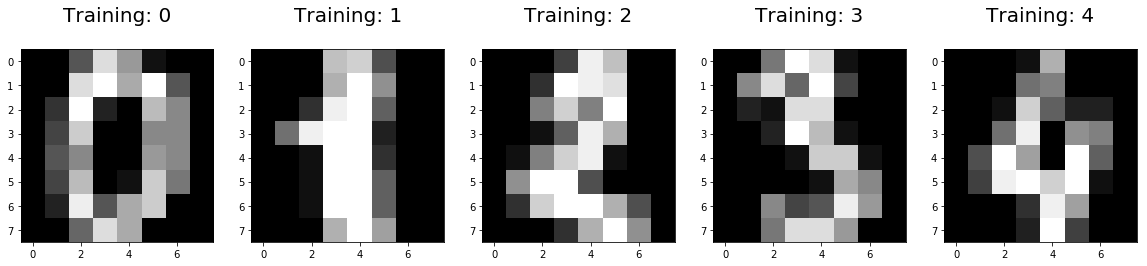

In [53]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [55]:
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression(solver= 'lbfgs',  max_iter=10000)

In [56]:
logisticRegr.fit(x_train, y_train)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [57]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

0.9511111111111111


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  1  0  3  0]
 [ 0  0 42  2  0  0  0  0  0  0]
 [ 0  0  1 44  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  2  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  2 43]]


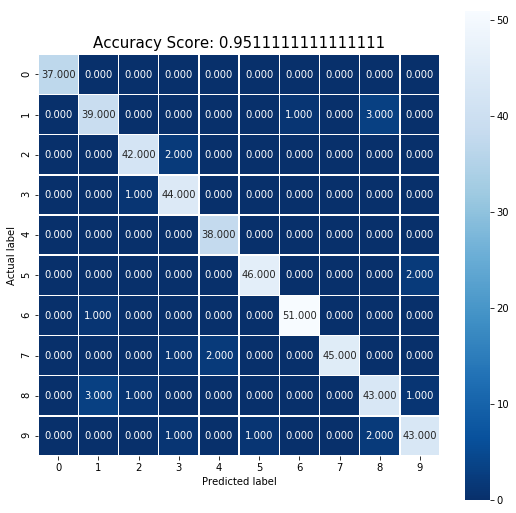

In [59]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);